In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import scipy.sparse as sp
import scanpy as sc
import anndata as ad

In [2]:
path_main = '../../data/only_healthy_data'
figure_outputs = '../../figures/exp01/1_figures'
if not os.path.exists(path_main):
    # Create the directory if it doesn't exist
    os.makedirs(path_main)
    print(f"Directory '{path_main}' created.")
else:
    print(f"Directory '{path_main}' already exists.")

Directory '../../data/only_healthy_data' already exists.


In [3]:
paths_raw = pd.read_csv(f'{path_main}/healthy_only_pathway_abundance_raw_counts.txt', sep='\t', index_col=0, header=0)
# fixing names from initial processing
def process_column_name(col):
    if col.startswith('EGAR'):
        parts = col.split('_')
        if len(parts) > 1:
            return parts[1].replace('LL', '')
    return col  
def remove_i_j(name):
    if isinstance(name, str):
        if name.startswith('i'):
            name = name[1:]
        if name.startswith('j'):
            name = name[1:]
    return name

paths_raw.columns = [process_column_name(col) for col in paths_raw.columns] # sample names fixing
paths_raw.loc['study'] = paths_raw.loc['study'].apply(remove_i_j) # study names fixing

/tmp/ipykernel_3256394/1266241255.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,2

In [4]:
paths_raw

,ERR688551,ERR688544,ERR710432,ERR688610,ERR688646,ERR688530,ERR688523,ERR688594,ERR688507,ERR688614,...,SRR8146983,SRR8146959,SRR8146939,SRR8146973,SRR6367598,SRR8146942,SRR6367587,SRR8146941,SRR8146955,SRR8146972
# Pathway,,,,,,,,,,,,,,,,,,,,,
UNMAPPED,6156825.400702,7974467.548391,12226014.479723,15339767.935478,11519597.251935,11796702.117867,11733393.324923,3757401.221066,11961427.626213,7696276.908378,...,6840598.384357,9793777.581458,8517916.124957,8520427.186765,11186468.033935,9148882.837137,6729752.835922,7154063.376532,10131848.070331,7004872.412744
UNINTEGRATED,5470911.748671,3947222.190438,8088756.217487,5173040.813939,8751948.936696,9171774.180277,6209455.274435,8543916.586809,10538864.354239,3906450.690716,...,5571782.396239,8898705.982375,7168741.931743,9685420.31642,10865206.301449,9210924.140232,9982812.128065,7551534.063034,16436889.093535,6163491.357824
UNINTEGRATED|g__Gemmiger.s__Gemmiger_formicilis,1229298.659585,66732.488218,201171.660232,90054.307867,349054.918509,203588.73872,205882.381059,0.0,650518.399416,90092.16201,...,23597.137584,60720.202086,58419.718399,195753.233851,1092076.416194,22111.949502,107633.388617,17080.177443,155341.718118,34865.373129
UNINTEGRATED|g__Faecalibacterium.s__Faecalibacterium_prausnitzii,652938.072497,406583.775285,293037.032535,488774.154143,1755142.423066,1182460.708295,989489.327862,98338.642611,1215599.790545,345827.986212,...,717109.562175,1206980.200593,1062150.772002,1669691.410973,4603800.411469,1397622.117128,1618507.976352,371317.555538,1102514.239078,632457.318698
UNINTEGRATED|g__Akkermansia.s__Akkermansia_muciniphila,648538.706029,185450.197864,0.0,0.0,182624.868507,0.0,357059.508245,40721.333093,1042175.997412,20406.148453,...,566195.050834,0.0,14259.200185,103149.027976,0.0,34976.979834,0.0,344451.784414,60767.663091,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PWY-7560: methylerythritol phosphate pathway II|g__Actinomyces.s__Actinomyces_naeslundii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PWY-6270: isoprene biosynthesis I|g__Actinomyces.s__Actinomyces_naeslundii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PWY-6125: superpathway of guanosine nucleotides de novo biosynthesis II|g__Actinomyces.s__Actinomyces_graevenitzii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
meta_raw = pd.read_csv(f'{path_main}/healthy_only_metadata_raw.csv', index_col = 0)
df = paths_raw.loc[:, paths_raw.columns.isin(meta_raw.index)]

In [6]:
top2_rows = df.head(2)
# filter for classified rows only
df = df.drop(labels=['UNMAPPED', 'UNINTEGRATED', 'UNINTEGRATED|unclassified']) # drop unclassified data
df = df[~(df.index.str.contains('g_') | 
          df.index.str.contains('s_') | 
          df.index.str.contains('UNINTEGRATED') | 
          df.index.str.contains('unclassified'))]
print(df.shape)

#remove 0 rows and columns 
df = df[(df != 0).any(axis=1)]
df = df.loc[:, (df != 0).any()]
print(df.shape)

# Extract the last row as metadata
row_to_update = df.loc['study'].apply(lambda x: 'EGAR' if x.startswith('EGAR') else x)
df.loc['study'] = row_to_update
metadata_row = df.iloc[-1]
#metadata_row.to_csv(f'{path_main}/studynames_{date}_pathabundance.csv', sep=',', index=True, header=True) 
metadata_row = pd.DataFrame(metadata_row.transpose())
df = df.drop(index=df.index[-1]) # drop study rows

(756, 11365)
(756, 11365)


In [7]:
meta_raw_study = pd.merge(metadata_row, meta_raw, left_index=True, right_index=True)

In [8]:
# filtering out processsed infant samples
PRJEB49206 = pd.read_csv('/data/lab_vm/release/deep_enterotypes/data/only_healthy_data/PRJEB49206_metadata.csv')
hadza_infant_reads = PRJEB49206[PRJEB49206['Population'] == 'Hadza (infant)']['Reads_accession']
meta_raw_study = meta_raw_study[~meta_raw_study.index.isin(hadza_infant_reads)]
df = df.loc[:, ~df.columns.isin(hadza_infant_reads)]

In [9]:
PRJEB49206.set_index('Reads_accession', inplace=True)
for index in meta_raw_study.index:
    if index in PRJEB49206.index:
        meta_raw_study.at[index, 'country'] = PRJEB49206.at[index, 'Population']

In [10]:
meta_raw_study['country'].unique().tolist()

['Austria',
 'Ethiopia',
 'Denmark',
 'Spain',
 'Italy',
 'Tanzania, United Republic of',
 'India',
 'Luxembourg',
 'China',
 'United States',
 'Canada',
 'Netherlands',
 'USA',
 'Germany',
 'Japan',
 'France',
 'Ireland',
 'Kazakhstan',
 'Sweden',
 'Iceland',
 'Cameroon',
 'Korea, Republic of',
 'Ghana',
 'Norway',
 'Yugoslavia',
 'Slovakia',
 'United Kingdom',
 'Nepal (Raji)',
 'Hadza',
 'Nepal (Tharu)',
 'Nepal (Chepang)',
 'California',
 'Nepal (Raute)',
 'Bangladesh',
 'Mongolia',
 'Israel',
 'Madagascar',
 'Finland',
 'Fiji',
 'Indonesia']

In [11]:
meta_raw_study.loc[(meta_raw_study['country'] == 'Hadza') | 
    (meta_raw_study['country'] == 'Nepal (Tharu)') | 
    (meta_raw_study['country'] == 'Nepal (Chepang)') |
    (meta_raw_study['country'] == 'Nepal (Raute)') |
    (meta_raw_study['country'] == 'Nepal (Raji)'), 
    'Global Region'
] = 'Global South'
meta_raw_study.loc[
    meta_raw_study['country'] == 'California', 
    'Global Region'
] = 'Global North'
meta_raw_study.loc[
    meta_raw_study['country'] == 'Iceland', 
    'Global Region'
] = 'Global North'
meta_raw_study.loc[
    (meta_raw_study['country'] == 'Nepal (Tharu)') | 
    (meta_raw_study['country'] == 'Nepal (Chepang)') |
    (meta_raw_study['country'] == 'Nepal (Raute)') |
    (meta_raw_study['country'] == 'Nepal (Raji)'), 
    'country'
] = 'Nepal'
meta_raw_study.loc[(meta_raw_study['country'] == 'Hadza'), 
    'country'
] = 'Tanzania'
meta_raw_study.loc[(meta_raw_study['country'] == 'California'), 
    'country'
] = 'United States'
meta_raw_study.loc[(meta_raw_study['country'] == 'Korea, Republic of'), 
    'country'
] = 'Korea'
meta_raw_study.loc[(meta_raw_study['country'] == 'Tanzania, United Republic of'), 
    'country'
] = 'Tanzania'
meta_raw_study.loc[(meta_raw_study['country'] == 'USA'), 
    'country'
] = 'United States'

In [12]:
# Convert the DataFrame to an AnnData object
adata = ad.AnnData(df.transpose())
adata.X = adata.X.astype(float)
adata.X = sp.csr_matrix(adata.X)
# Add the metadata row to .obs
adata.obs = meta_raw_study

In [14]:
# Filter out genes with non-zero expression in less than 1 cells
sc.pp.filter_genes(adata, min_cells=1)
# filter out cells that express no genes
sc.pp.filter_cells(adata, min_genes=1)
# Calculate total number of counts and total number of genes
adata.obs["n_counts"] = adata.X.sum(axis=1) # number of expressions of a row
adata.obs["n_pathways"] = (adata.X>0).sum(axis=1) # count the number of non-zero cells in a row

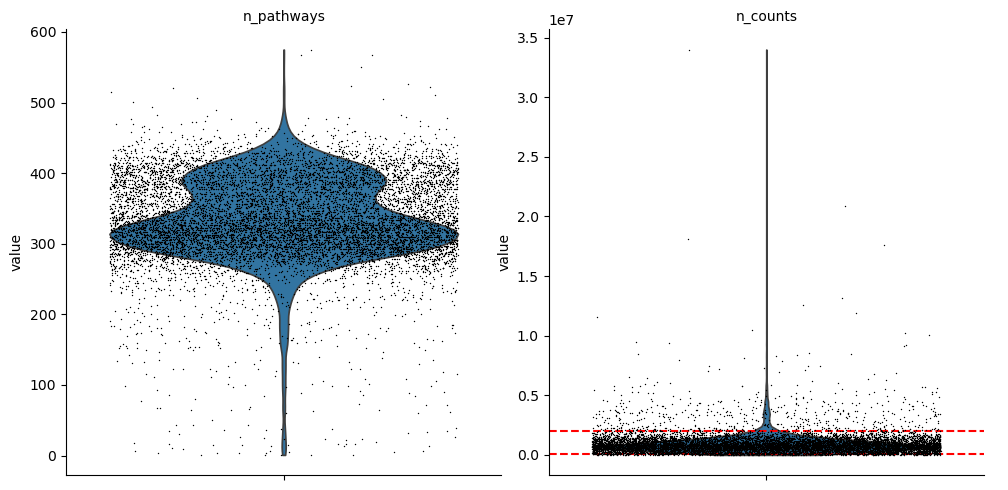

In [15]:
# Plot the violin plots and retrieve the FacetGrid object
grid = sc.pl.violin(
    adata,
    ['n_pathways', 'n_counts'],
    jitter=0.4,
    multi_panel=True,
    show=False
)

# Flatten the axes for easy indexing
axes = grid.axes.flatten()

# Add dashed lines at 100k and 2M on the 'n_counts' plot
axes[1].axhline(y=1e5, linestyle='--', color='red')
axes[1].axhline(y=2e6, linestyle='--', color='red')
plt.savefig(f'{figure_outputs}/figure1B.pdf', format='pdf')

# Display the plot
plt.show()


In [16]:
df.to_csv(f'{path_main}/healhty_classified_raw_pathways_counts.csv', sep=',', index=True, header=True) 

In [17]:
df

,ERR688551,ERR688544,ERR710432,ERR688610,ERR688646,ERR688530,ERR688523,ERR688594,ERR688507,ERR688614,...,SRR8146983,SRR8146959,SRR8146939,SRR8146973,SRR6367598,SRR8146942,SRR6367587,SRR8146941,SRR8146955,SRR8146972
# Pathway,,,,,,,,,,,,,,,,,,,,,
PWY-7238: sucrose biosynthesis II,10514.925901,14672.921574,15668.216604,16248.729605,23259.850565,31732.307737,23776.436505,18725.551853,28575.921552,9959.045862,...,7917.293392,15703.737518,10235.173486,12050.898218,31644.654721,10558.992098,10631.336942,10399.674317,16044.17371,7894.659766
PWY-1042: glycolysis IV,10290.99354,13354.178502,16268.887827,20333.088698,18955.164878,23504.344133,22199.655474,10607.34001,24925.030176,8952.869558,...,10556.868554,14558.456767,10720.428304,12161.711741,20302.959961,12270.35142,10584.179265,10808.103182,17535.521517,10430.750603
GLYCOGENSYNTH-PWY: glycogen biosynthesis I (from ADP-D-Glucose),9335.298101,13076.67219,10426.118728,13416.075653,20346.061321,22865.7212,20643.621758,13106.864667,23429.275604,8359.126341,...,6428.747598,12984.877562,8112.643913,9018.909897,18384.904965,8117.550742,8565.807364,7060.749241,12022.725869,6207.666862
VALSYN-PWY: L-valine biosynthesis,9157.870535,8800.972061,12708.738743,12169.692449,19959.013014,22185.406935,17977.885572,16396.318185,22957.129016,7134.635293,...,5804.300372,11725.285216,8133.459446,10422.018614,23438.70967,9615.724083,11921.010446,7241.036994,14867.207769,7093.146311
ILEUSYN-PWY: L-isoleucine biosynthesis I (from threonine),8562.321002,8094.507347,12089.580201,11209.334467,17500.807469,21101.79664,16557.439842,14309.707347,21414.988736,6400.52823,...,5783.606632,11102.887365,8041.502701,9721.935318,19739.29288,9047.593451,11067.465671,6369.723368,14356.720423,6856.954592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PWY-6117: spermine and spermidine degradation I,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PWY-5068: chlorophyll cycle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PWY66-374: C20 prostanoid biosynthesis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


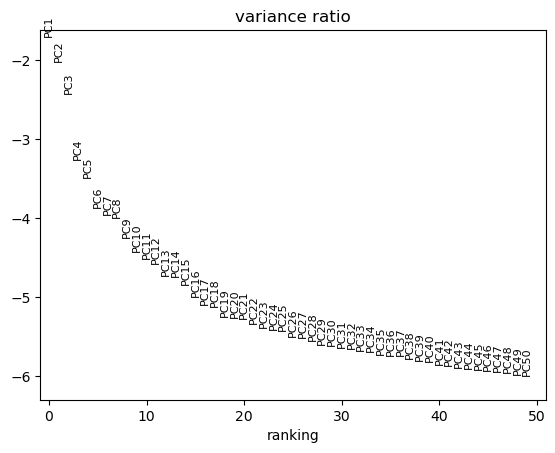

/data/lab_vm/campervans/mmeawad_test/anaconda/test4.2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-24 18:25:49.981255: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-24 18:25:50.106879: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN

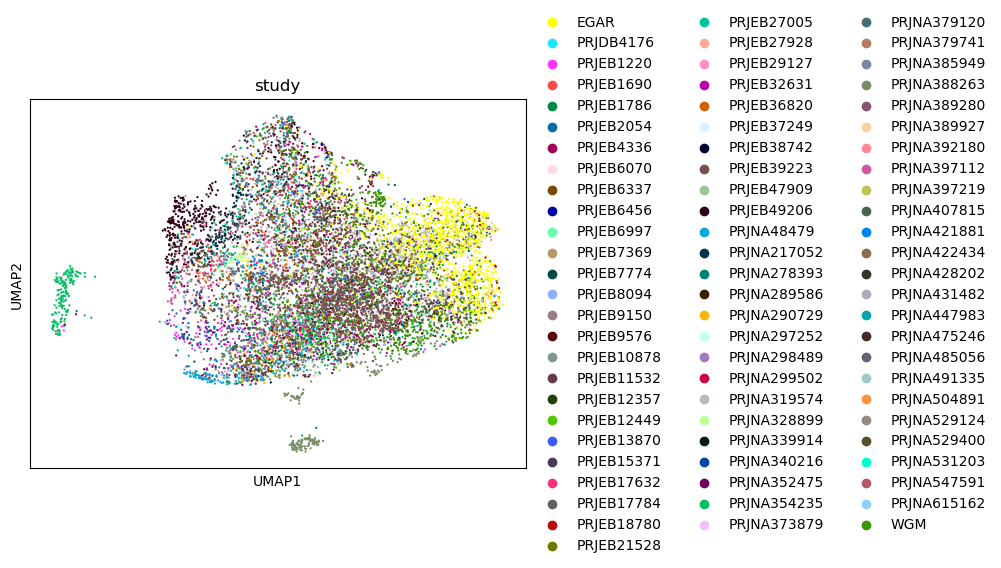

/data/lab_vm/campervans/mmeawad_test/anaconda/test4.2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


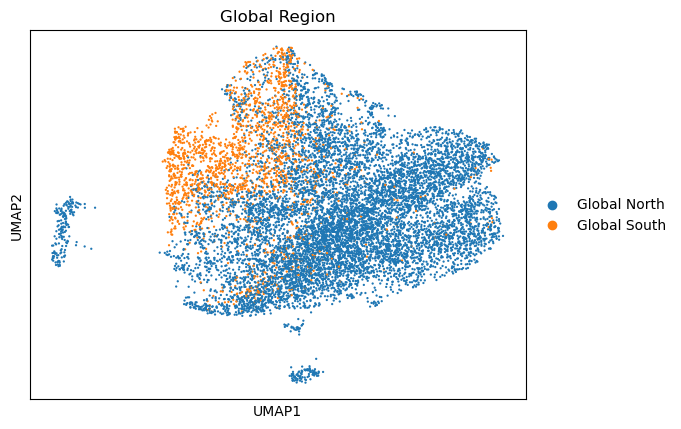

In [18]:
adata_original = adata.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

sc.pp.neighbors(adata, n_pcs=50, n_neighbors=15)
sc.tl.umap(adata)
obs_list = ['study', 'Global Region']
for i in obs_list:
    sc.pl.umap(adata, color=i)

# sample and pathways filtering 

In [19]:
# filtering samples with >= 100000 and <= 2000000 counts
df_filtered = df.loc[:, (df.sum() >= 100000) & (df.sum() <= 2000000)]

# filtering paths
threshold_percentage = 10
threshold_value = len(df_filtered.columns) * (threshold_percentage / 100)
df_filtered = df_filtered[df_filtered[df_filtered != 0].count(axis=1) >= threshold_value]

common_columns = df_filtered.columns.intersection(meta_raw_study.transpose().columns)
meta_filtered_study = meta_raw_study.transpose()[common_columns]
meta_filtered_study = meta_filtered_study.transpose()

# filtering for studies with >30 samples 
study_sample_counts = meta_filtered_study['study'].value_counts()
valid_studies = study_sample_counts[study_sample_counts >= 30].index
meta_filtered_study = meta_filtered_study[meta_filtered_study['study'].isin(valid_studies)]
meta_filtered_study = meta_filtered_study[meta_filtered_study['study'].notna()]
meta_filtered_study_filtered = meta_filtered_study[meta_filtered_study['study'] != 'NA']
df_filtered = df_filtered.loc[:, df_filtered.columns.isin(meta_filtered_study_filtered.index)]
df_filtered.shape


(436, 9838)

In [20]:
# Update the column names to add 'EGAR' if they start with '900' for R processing
df_filtered.columns = ['EGAR' + col if col.startswith('900') else col for col in df_filtered.columns]
df_filtered.columns = ['EGAR' + col if col.startswith('200') else col for col in df_filtered.columns]

# Update the column names to add 'EGAR' if they start with '900' for R processing
meta_filtered_study.index = ['EGAR' + str(idx) if str(idx).startswith('900') else str(idx) for idx in meta_filtered_study.index]
meta_filtered_study.index = ['EGAR' + str(idx) if str(idx).startswith('200') else str(idx) for idx in meta_filtered_study.index]


In [21]:
meta_filtered_study.to_csv(f'{path_main}/filtered_paths_healthy_samples_metadata.csv', sep=',', index=True, header=True) 
df_filtered.to_csv(f'{path_main}/filtered_paths_healthy_samples_pathway_counts.csv', sep=',', index=True, header=True) 

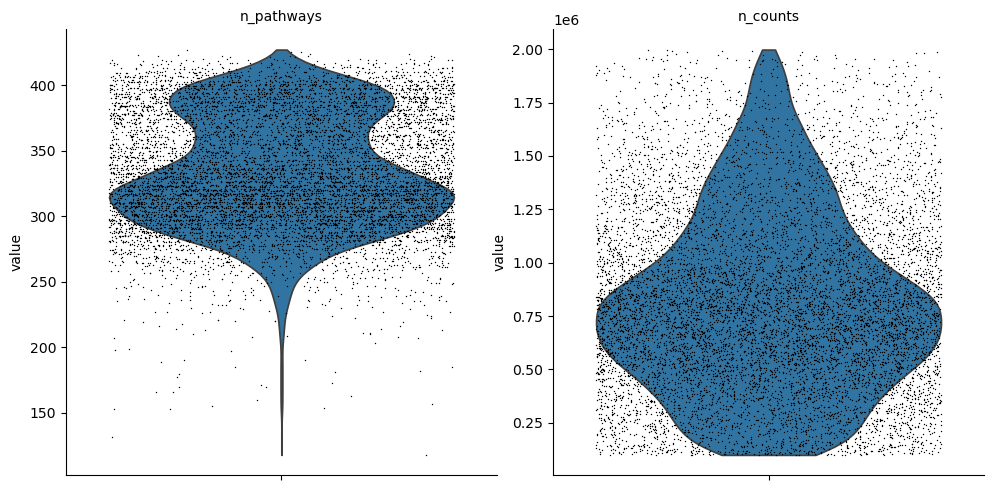

In [22]:
# Convert the DataFrame to an AnnData object, excluding the last row
adata = ad.AnnData(df_filtered.transpose())
adata.X = adata.X.astype(float)
adata.X = sp.csr_matrix(adata.X)

# Add the metadata to .obs
adata.obs = meta_filtered_study

# Filter out genes with non-zero expression in less than 1 cells
sc.pp.filter_genes(adata, min_cells=1)

# filter out cells that express no genes
sc.pp.filter_cells(adata, min_genes=1)

# Calculate total number of counts and total number of genes
adata.obs["n_counts"] = adata.X.sum(axis=1) # number of expressions of a row
adata.obs["n_pathways"] = (adata.X>0).sum(axis=1) # count the number of non-zero cells in a row
sc.pl.violin(adata, ['n_pathways', 'n_counts'], jitter=0.4, multi_panel=True) 

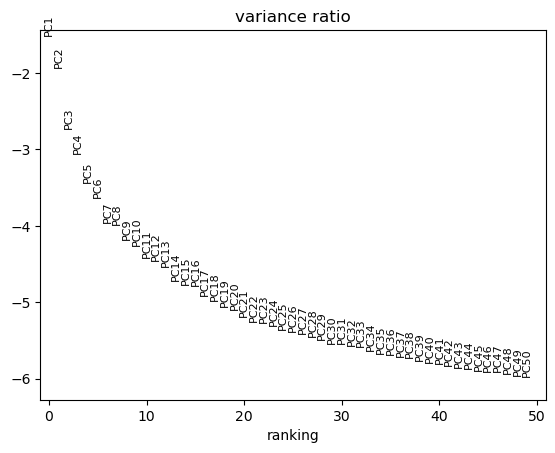

/data/lab_vm/campervans/mmeawad_test/anaconda/test4.2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


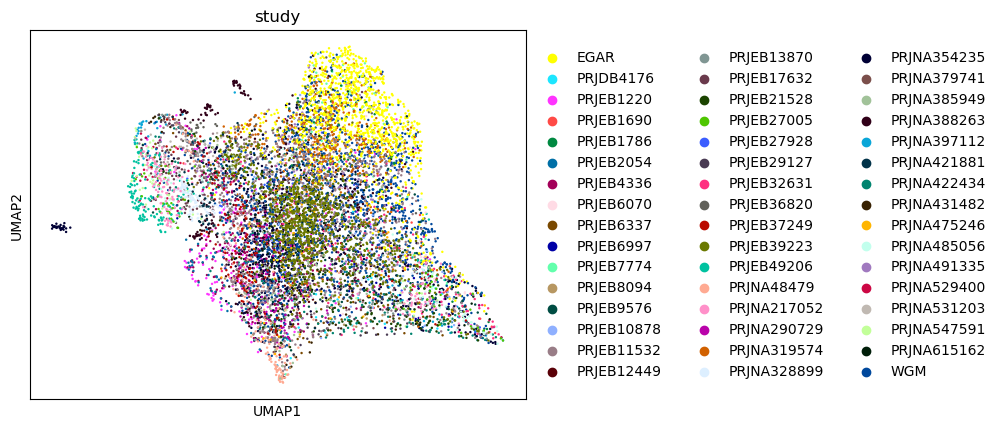

/data/lab_vm/campervans/mmeawad_test/anaconda/test4.2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


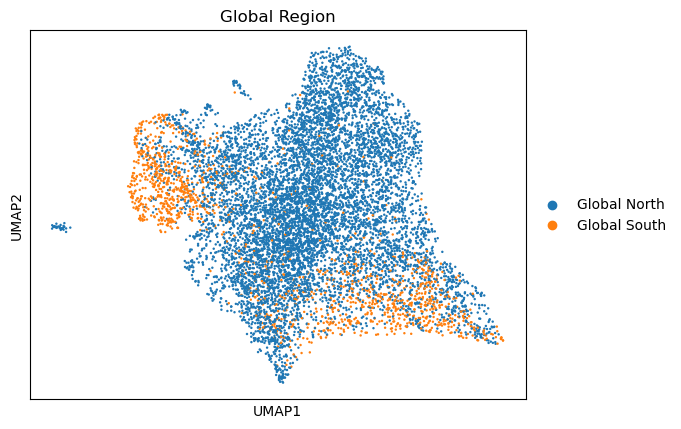

In [23]:
adata_original = adata.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

sc.pp.neighbors(adata, n_pcs=50, n_neighbors=15)
sc.tl.umap(adata)
obs_list = ['study', 'Global Region']

# Generate UMAP plots for each observation variable and save them
for obs in obs_list:
    # Create the UMAP plot
    sc.pl.umap(adata, color=obs, show=False)
    # Save the plot
    plt.savefig(os.path.join(figure_outputs, f"{obs}.pdf"), bbox_inches="tight")
    plt.show()
